 Install the Kaggle library

In [ ]:
! pip install kaggle

Make a directory named “.kaggle”

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Copy the “kaggle.json” into this new directory

In [ ]:
! cp kaggle.json ~/.kaggle/

Allocate the required permission for this file.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

Download datasets

In [ ]:
! kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

diabetic-retinopathy-level-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


Unzip

In [ ]:
!unzip diabetic-retinopathy-level-detection.zip

Archive:  diabetic-retinopathy-level-detection.zip
replace inception-diabetic.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Create Training And Testing Path

In [ ]:
imageSize = [299, 299]
trainPath = r"/content/preprocessed dataset/preprocessed dataset/training"
testPath = r"/content/preprocessed dataset/preprocessed dataset/testing"

Importing The Libraries

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import Xception, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

Configure ImageDataGenerator Class

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range= 0.2,
                                    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)


Apply ImageDataGenerator Functionality To Train Set And Test Set


In [ ]:
training_set = train_datagen.flow_from_directory('/content/preprocessed dataset/preprocessed dataset/training',
                                                  target_size = (299, 299),
                                                  batch_size = 16,
                                                  class_mode= 'categorical')
test_set = test_datagen.flow_from_directory(testPath, target_size = (299,299),batch_size = 16, class_mode = 'categorical')

Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


Model Building

Pre-Trained CNN Model As A Feature Extractor

In [ ]:
xception= Xception(input_shape=imageSize + [3], weights='imagenet', include_top=False)


83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False


In [ ]:
#our layers - you can add more if you want
x = Flatten()(xception.output)

Adding Dense Layers

In [ ]:
prediction = Dense(5, activation='softmax')(x)


In [ ]:
# create a model object
model=Model(inputs=xception.input, outputs=prediction)

summary

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

Configure The Learning Process

In [ ]:
# tell the model what cost and optimization method to use
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Train The Model

In [ ]:
#fit the model
r = model.fit_generator(training_set, validation_data = test_set, epochs = 30, steps_per_epoch = len(training_set)//16, validation_steps = len(test_set)//16)

<ipython-input-106-04dce30b13a4>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set, validation_data = test_set, epochs = 30, steps_per_epoch = len(training_set)//16, validation_steps = len(test_set)//16)


Epoch 1/30
14/14 [==============================] - 138s 9s/step - loss: 9.2737 - accuracy: 0.5045 - val_loss: 6.4225 - val_accuracy: 0.5312
Epoch 2/30
14/14 [==============================] - 134s 9s/step - loss: 5.5371 - accuracy: 0.6339 - val_loss: 5.7234 - val_accuracy: 0.6562
Epoch 3/30
14/14 [==============================] - 135s 9s/step - loss: 5.1981 - accuracy: 0.6473 - val_loss: 6.0525 - val_accuracy: 0.4688
Epoch 4/30
14/14 [==============================] - 126s 9s/step - loss: 6.2716 - accuracy: 0.6071 - val_loss: 2.4349 - val_accuracy: 0.8125
Epoch 5/30
14/14 [==============================] - 149s 11s/step - loss: 5.0776 - accuracy: 0.6830 - val_loss: 2.6501 - val_accuracy: 0.6562
Epoch 6/30
14/14 [==============================] - 127s 9s/step - loss: 5.0044 - accuracy: 0.6607 - val_loss: 3.9882 - val_accuracy: 0.7188
Epoch 7/30
14/14 [==============================] - 138s 10s/step - loss: 5.4103 - accuracy: 0.6652 - val_loss: 4.9875 - val_accuracy: 0.5312
Epoch 8/30


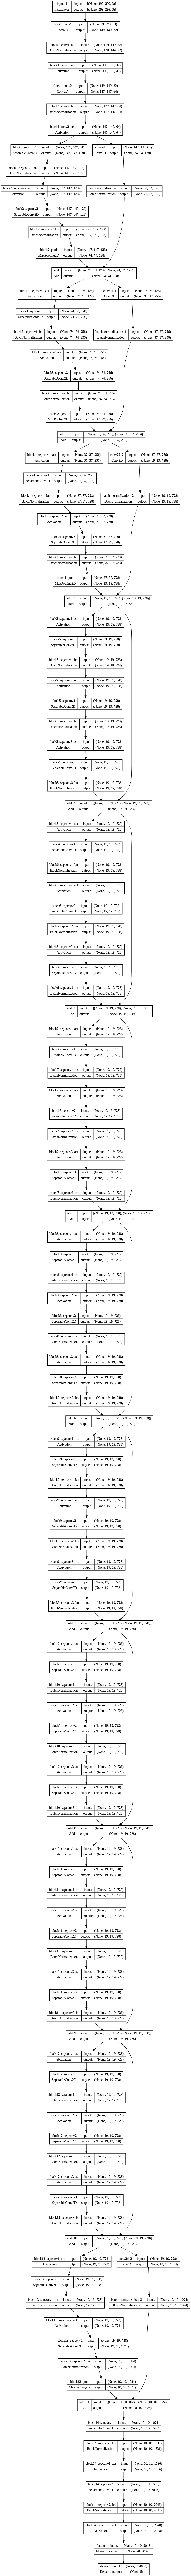

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Save The Model

In [ ]:
model.save('Updated-xception-diabetic-retinopathy.h5')